In [ ]:
import tensorflow as tf
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"  # see issue #152
os.environ['CUDA_VISIBLE_DEVICES'] = '0'  # -1  to USE CPU
from keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense,Dropout
from keras.models import Model, load_model
from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt
import time
from os import listdir
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd  /content/gdrive/My Drive/Testing/glioma_tumor
!ls
img = cv2.imread("image(100).jpg")



/content/gdrive/My Drive/Testing/glioma_tumor
'image(100).jpg'  'image(32).jpg'  'image(55).jpg'  'image(78).jpg'
'image(10).jpg'   'image(33).jpg'  'image(56).jpg'  'image(79).jpg'
'image(11).jpg'   'image(34).jpg'  'image(57).jpg'  'image(7).jpg'
'image(12).jpg'   'image(35).jpg'  'image(58).jpg'  'image(80).jpg'
'image(13).jpg'   'image(36).jpg'  'image(59).jpg'  'image(81).jpg'
'image(14).jpg'   'image(37).jpg'  'image(5).jpg'   'image(82).jpg'
'image(15).jpg'   'image(38).jpg'  'image(60).jpg'  'image(83).jpg'
'image(16).jpg'   'image(39).jpg'  'image(61).jpg'  'image(84).jpg'
'image(17).jpg'   'image(3).jpg'   'image(62).jpg'  'image(85).jpg'
'image(18).jpg'   'image(40).jpg'  'image(63).jpg'  'image(86).jpg'
'image(19).jpg'   'image(41).jpg'  'image(64).jpg'  'image(87).jpg'
'image(1).jpg'	  'image(42).jpg'  'image(65).jpg'  'image(88).jpg'
'image(20).jpg'   'image(43).jpg'  'image(66).jpg'  'image(89).jpg'
'image(21).jpg'   'image(44).jpg'  'image(67).jpg'  'image(8).jpg'
'imag

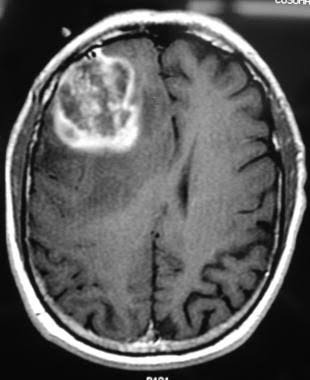

In [ ]:
#from google.colab.patches import cv2_imshow
import cv2

# Load an image
img = cv2.imread('image(77).jpg')

# Display the image
cv2_imshow(img)

In [ ]:
target_img = cv2.imread('image(77).jpg')
folder_path = '/content/gdrive/My Drive/Testing/glioma_tumor'

folder_images = []
for filename in os.listdir(folder_path):
    img = cv2.imread(os.path.join(folder_path, filename))
    if img is not None:
        folder_images.append(img)

In [ ]:
target_img = cv2.resize(target_img, (224, 224))
folder_images = [cv2.resize(img, (224, 224)) for img in folder_images]

In [ ]:
sift = cv2.SIFT_create()

target_kp, target_des = sift.detectAndCompute(target_img, None)

folder_kps = []
folder_des = []
for img in folder_images:
    kp, des = sift.detectAndCompute(img, None)
    folder_kps.append(kp)
    folder_des.append(des)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

X = [des for des_list in folder_des for des in des_list]
y = [i for i in range(len(folder_images)) for j in range(len(folder_des[i]))]

knn.fit(X, y)

KNeighborsClassifier()

The target image is most similar to image 81 in the folder.


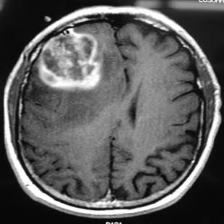

--Most Similar Image------


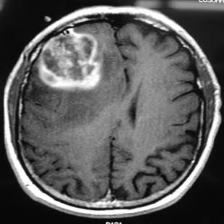

In [ ]:
target_des = target_des.astype(float)
target_prediction = knn.predict(target_des)
most_similar_img = folder_images[target_prediction[0]]
print(f"The target image is most similar to image {target_prediction[0]} in the folder.")


cv2_imshow(target_img)
print("--Most Similar Image------")
cv2_imshow(most_similar_img)
# # Show target and most similar images
# cv2.imshow('Target Image', target_img)
# cv2.imshow('Most Similar Image', folder_images[target_prediction[0]])
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# target_des = target_des.astype(float)
# target_prediction = knn.predict(target_des)
# folder_names = ['glioma_tumor', 'no_tumor', 'meningioma_tumor', 'pituitary_tumor']
# if target_prediction[0] >= len(folder_names):
#     print("Error: Invalid target prediction index.")
# else:
#     folder_name = folder_names[target_prediction[0]]
#     most_similar_img = folder_images[target_prediction[0]]
#     print(f"The target image is most similar to image {target_prediction[0]} in the {folder_name} folder.")
#     cv2_imshow(target_img)
#     cv2_imshow(most_similar_img)